    temp  sale
0      1     3
1      2     8
2      3    15
3      4    24
4      5    35
5      6    48
6      7    63
7      8    80
8      9    99
9     10   120
10    11   143
11    12   168
12    13   196
13    14   224
14    15   255
a:  1.0015352294764093
b:  1.9932934712368153
c:  -0.006593406595607254


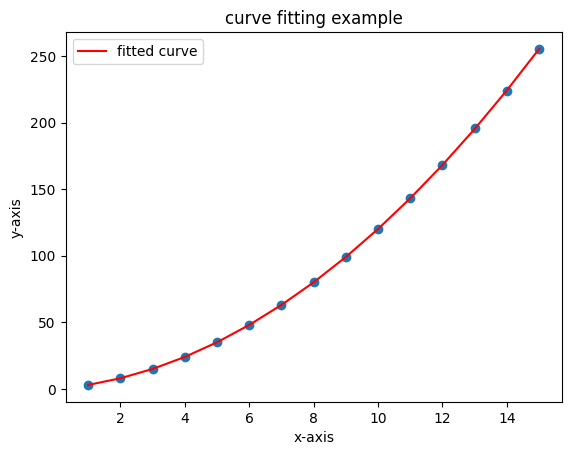

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import curve_fit
import pandas as pd

# temp = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# sales = [3, 8, 15, 24, 35, 48, 63, 80, 99, 120, 143, 168, 196,224, 255]

df = pd.read_excel('excel.xlsx')
print(df)
x_data = df.temp
y_data = df.sale

def fitting_func(x,a,b,c):
    y = a*x**2 + b*x + c
    return y

opt, cov = curve_fit(fitting_func, x_data, y_data)
print("a: ",opt[0])
print("b: ",opt[1])
print("c: ",opt[2])

plt.scatter(df.temp, df.sale)
plt.plot(df.temp, fitting_func(x_data, opt[0], opt[1], opt[2]),'r-', label = 'fitted curve')
plt.legend()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("curve fitting example")
plt.show()

a:  1.0994787289188628
b:  0.25295368936699836


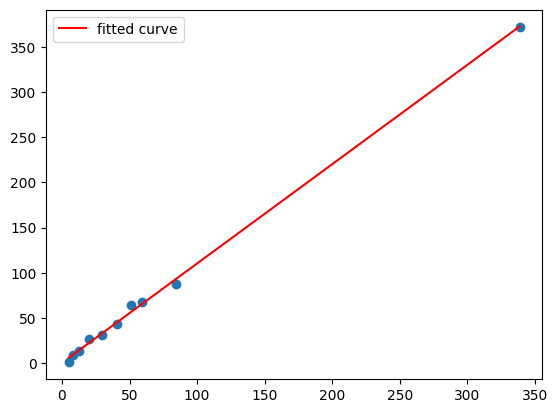

In [6]:

df = pd.read_excel('excel1.xlsx')
x_data = df.Pop2000
y_data = df.Pop2010
def linear_func(x, a, b):
    return (a*x + b)
def quadratic_func(x, a, b, c):
    return (a*x**2 + b*x + c)

arr, cov = curve_fit(linear_func, x_data, y_data)
# arr, cov = curve_fit(quadratic_func, x_data, y_data)

print("a: ",arr[0])
print("b: ",arr[1])
# print("c: ",arr[2])

plt.scatter(x_data, y_data)
plt.plot(x_data,linear_func(x_data, arr[0], arr[1]),'r-', label = 'fitted curve' )
plt.legend()

a:  -5.44022905537887e-05
b:  1.1186681346698515
c:  -0.278127153191585
error:  [0.09396037044389269, 0.4204431688585312, 1.502905616722415, 4.291088400977328, 9.909101463897146, 19.618956550959773, 32.11553173331728, 42.60558730591007, 86.89790499903289, 1134.017343855478]


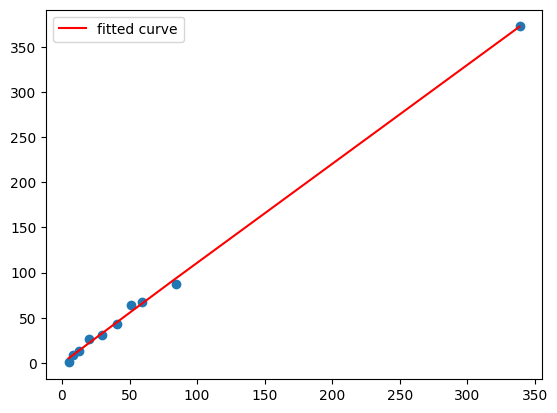

In [7]:
df = pd.read_excel('excel1.xlsx')
x_data = df.Pop2000
y_data = df.Pop2010

def linear_func(x, a, b):
    return (a*x + b)
def quadratic_func(x, a, b, c):
    return (a*x**2 + b*x + c)

# arr, cov = curve_fit(linear_func, x_data, y_data)
arr, cov = curve_fit(quadratic_func, x_data, y_data)

print("a: ",arr[0])
print("b: ",arr[1])
print("c: ",arr[2])

plt.scatter(x_data, y_data)
plt.plot(x_data,quadratic_func(x_data, arr[0], arr[1], arr[2]),'r-', label = 'fitted curve' )
plt.legend()

error = []
for x in x_data:
    error.append((x - quadratic_func(x,arr[0], arr[1], arr[2]))**2)

print( "error: ", error)

## Attempt of self for multi-variate

In [8]:
y = [256000, 264000, 273000, 281000, 296000, 310000, 344000, 351000, 363000, 376000, 386000, 393000, 417000, 445000, 461000]
x1 = [14000, 15000, 16000, 17000, 17000, 18000, 20000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000]
x2 = [129000, 136000, 142000, 145000, 149000, 161000, 180000, 185000, 193000, 200000, 204000, 208000, 212000, 219000, 226000]

q = [ [val] for val in y]

#no. of data points
n = len(y)

V = np.zeros((n,2))
for i in range(n):
    V[i][0] = x1[i]
    V[i][1] = x2[i]
print("Our Lambda Matrix is:\n", V)
print("Our 'q' Matrix is:\n", q)

Our Lambda Matrix is:
 [[ 14000. 129000.]
 [ 15000. 136000.]
 [ 16000. 142000.]
 [ 17000. 145000.]
 [ 17000. 149000.]
 [ 18000. 161000.]
 [ 20000. 180000.]
 [ 22000. 185000.]
 [ 23000. 193000.]
 [ 24000. 200000.]
 [ 25000. 204000.]
 [ 26000. 208000.]
 [ 27000. 212000.]
 [ 28000. 219000.]
 [ 29000. 226000.]]
Our 'q' Matrix is:
 [[256000], [264000], [273000], [281000], [296000], [310000], [344000], [351000], [363000], [376000], [386000], [393000], [417000], [445000], [461000]]


In [9]:
# Vt = [[V[i][j] for i in range(0,len(V))] for j in range(0,len(V[0]))]

Vt= np.zeros((len(V[0]), len(V)))
for i in range(0, len(V[0])):
    for j in range(0, len(V)):
        Vt[i][j] = V[j][i]
print("The transpose of lambda matrix: \n",Vt)
# print(V.T)

The transpose of lambda matrix: 
 [[ 14000.  15000.  16000.  17000.  17000.  18000.  20000.  22000.  23000.
   24000.  25000.  26000.  27000.  28000.  29000.]
 [129000. 136000. 142000. 145000. 149000. 161000. 180000. 185000. 193000.
  200000. 204000. 208000. 212000. 219000. 226000.]]


In [10]:
# VtV
VtV = np.zeros((len(Vt), len(V[0])))
for i in range(len(Vt)):
    for j in range(len(Vt)):
        for k in range(len(V)):
            VtV[i][j] += Vt[i][k] * V[k][j]

print("The matrix product of Vt and V is:\n", VtV)

# print(np.matmul(Vt , V))
print(len(q))
Vtq = np.zeros((len(Vt), len(q[0])))
for i in range(len(Vt)):       #using rows in first matrix
    for j in range(len(q[0])):       # using columns in 2nd matrix
        for k in range(len(q)):         # columns 1st == rows 2nd
            Vtq[i][j] += Vt[i][k] * q[k][j]      
print(Vtq)

# print(np.matmul(Vt, q))
# print(np.dot(Vt, q))

The matrix product of Vt and V is:
 [[7.22300e+09 5.98410e+10]
 [5.98410e+10 4.97183e+11]]
15
[[1.16232e+11]
 [9.65100e+11]]


In [11]:
#multi VtV and Vtq
VtVInv = np.linalg.inv(VtV)
A = np.zeros((len(VtVInv) , len(Vtq[0])))
for i in range(len(VtVInv)):
    for j in range(len(Vtq[0])):
        for k in range(len(Vtq)):
            A[i][j] += VtVInv[i][k]* Vtq[k][j]
print(A)

[[3.52929289]
 [1.51635029]]


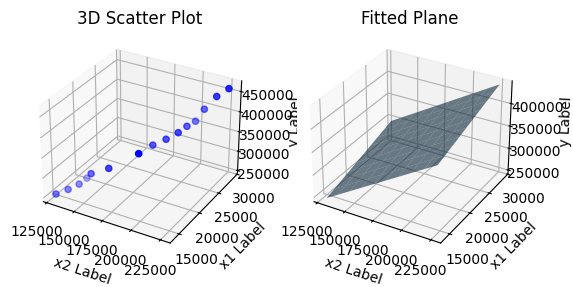

In [12]:
fig = plt.figure()

# Create a 3D subplot for the scatter plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x2, x1, y, c='b', marker='o')
ax.set_xlabel('x2 Label')
ax.set_ylabel('x1 Label')
ax.set_zlabel('y Label')
ax.set_title('3D Scatter Plot')

ax1 = fig.add_subplot(122, projection='3d')

# Create grid for the plane
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 10), np.linspace(min(x2), max(x2), 10))

# Calculate Z values for the plane
Z = 3.52929289 * X1 + 1.51635029 * X2

# Plot the surface
ax1.plot_surface(X2, X1, Z, alpha=0.6)

# Set labels and title for the plane subplot
ax1.set_xlabel('x2 Label')
ax1.set_ylabel('x1 Label')
ax1.set_zlabel('y Label')
ax1.set_title('Fitted Plane')

plt.show()

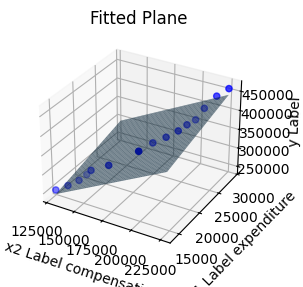

In [13]:
fig = plt.figure()

# Create a 3D subplot for the scatter plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x2, x1, y, c='b', marker='o')
ax.set_xlabel('x2 Label')
ax.set_ylabel('x1 Label')
ax.set_zlabel('y Label')
ax.set_title('3D Scatter Plot')
# Create grid for the plane
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))

# Calculate Z values for the plane
Z = 3.52929289 * X1 + 1.51635029 * X2

# Plot the surface
ax.plot_surface(X2, X1, Z, alpha=0.6)

# Set labels and title for the plane subplot
ax.set_xlabel('x2 Label compensation')
ax.set_ylabel('x1 Label expenditure')
ax.set_zlabel('y Label')
ax.set_title('Fitted Plane')
plt.show()

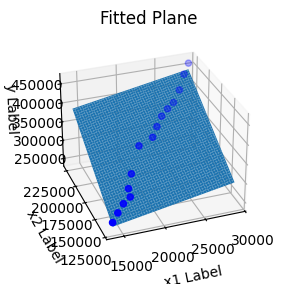

In [14]:
fig = plt.figure()

# Create a 3D subplot for the scatter plot
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x1, x2, y, c='b', marker='o')
ax.set_xlabel('x2 Label')
ax.set_ylabel('x1 Label')
ax.set_zlabel('y Label')
ax.set_title('3D Scatter Plot')
# Create grid for the plane
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))

# Calculate Z values for the plane
Z = 3.52929289 * X1 + 1.51635029 * X2

# Plot the surface
ax.plot_surface(X1, X2, Z, alpha =1)

# Set labels and title for the plane subplot
ax.set_xlabel('x1 Label')
ax.set_ylabel('x2 Label')
ax.set_zlabel('y Label')
ax.set_title('Fitted Plane')
ax.view_init(elev=30, azim=250)
plt.show()

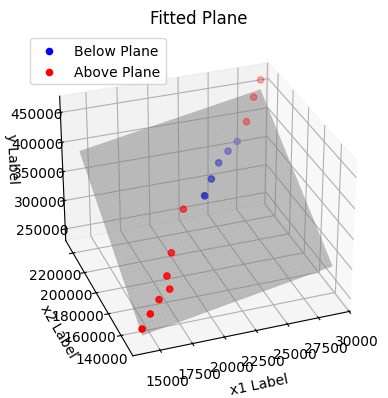

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([256000, 264000, 273000, 281000, 296000, 310000, 344000, 351000, 363000, 376000, 386000, 393000, 417000, 445000, 461000])
x1 = np.array([14000, 15000, 16000, 17000, 17000, 18000, 20000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000])
x2 = np.array([129000, 136000, 142000, 145000, 149000, 161000, 180000, 185000, 193000, 200000, 204000, 208000, 212000, 219000, 226000])

fig = plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches

# Create a 3D subplot for the scatter plot
ax = fig.add_subplot(121, projection='3d')

# Separate points below and above the plane
below_plane = y < (3.52929289 * x1 + 1.51635029 * x2)
above_plane = ~below_plane

# Scatter plot points below the plane with one color
ax.scatter(x1[below_plane], x2[below_plane], y[below_plane], c='b', marker='o', label='Below Plane')

# Scatter plot points above the plane with another color
ax.scatter(x1[above_plane], x2[above_plane], y[above_plane], c='r', marker='o', label='Above Plane')

ax.set_xlabel('x2 Label')
ax.set_ylabel('x1 Label')
ax.set_zlabel('y Label')
ax.set_title('3D Scatter Plot')
ax.legend()

# Create grid for the plane
X1, X2 = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))

# Calculate Z values for the plane
Z = 3.52929289 * X1 + 1.51635029 * X2

# Plot the surface
ax.plot_surface(X1, X2, Z, alpha=0.5, color='gray')

# Set labels and title for the plane subplot
ax.set_xlabel('x1 Label')
ax.set_ylabel('x2 Label')
ax.set_zlabel('y Label')
ax.set_title('Fitted Plane')
ax.view_init(elev=30, azim=250)

plt.show()

## notes

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# model is: y = a + bx1 + cx2

# df = pd.read_excel('excel.xlsx')
# print(df)
# x_data = df.temp
# y_data = df.sale

y = np.array([100, 120, 110, 90, 130, 105, 115, 95, 125, 112])
x1 = np.array([60,70,75,55,80,65,68,62,72,67])
x2 = np.array([10,8,5,12,6,9,])
# Stack the independent variables into a design matrix
X = np.column_stack((np.ones(len(y)),x1, x2))

# Calculate the coefficients using the normal equation
coefficients = np.matmul(np.linalg.inv(np.matmul(X.T, X)) ,np.matmul(X.T, y))

# Print the coefficients
print("Coefficient a's value:", coefficients[0])
print("Coefficient b's for x1:", coefficients[1])
print("Coefficient c's for x2:", coefficients[2])

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Separate points below and above the plane
below_plane = y < (coefficients[0] + coefficients[1] * x1 + coefficients[2] * x2)
above_plane = ~below_plane

# Scatter plot points below the plane with one color and above with other
ax.scatter(x1[below_plane]/10000, x2[below_plane]/100000, y[below_plane]/100000, c='b', label='Below Plane')
ax.scatter(x1[above_plane]/10000, x2[above_plane]/100000, y[above_plane]/100000, c='r', label='Above Plane')

# Create grid for the plane
X1, X2 = np.meshgrid(np.arange(min(x1), max(x1), 100), np.arange(min(x2), max(x2), 100))
# X1, X2 = np.meshgrid(x1, x2)


# Calculate Z values for the plane
Z = coefficients[0]+ coefficients[1] * X1 + coefficients[2] * X2
# Z = coefficients[0]+ coefficients[1] * x1 + coefficients[2] * x2

ax.plot_surface(X1/10000, X2/100000, Z/100000, alpha=0.5, color='green') #, cmap='viridis')
# ax.plot_trisurf(x1/10000, x2/100000, Z/100000, alpha=0.5, color='green')
ax.set_xlabel('edu expenditure, *10^4', fontsize=10)
ax.set_ylabel('empl. compensation, *10^5', fontsize=10)
ax.set_zlabel('GDP, *10^5', fontsize=10)
ax.set_title('Fitted Plane', fontsize=15)
ax.view_init(elev=30, azim=250)
ax.legend()
plt.figure()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 2 has size 6